In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [3]:
XOM = pd.read_csv('XOM.csv')

In [4]:
XOM2 = XOM[XOM['Year'].isin([2019,2020])]

year = []
week = []
start_price = [list(XOM[XOM['Year'].isin([2018])]["Adj Close"])[-1]]
end_price = []
mu = []
sigma = []
label = []

week_sign = []
for i in [2019, 2020]:
    for j in range(53):
        subset = XOM2[(XOM2.Week_Number == j) & (XOM.Year == i)]
        n = subset.shape[0]
        sign = np.where(np.mean(subset.Return >= 0) >= 0.5, 'green', 'red')
        for k in range(n):
            week_sign.append(sign.tolist())
            
        year.append(i)
        week.append(j)
        start_price.append(list(subset["Adj Close"])[-1])
        end_price.append(list(subset["Adj Close"])[-1])
        mu.append(np.round(100*np.mean(subset.Return), 2))
        sigma.append(np.round(100*np.std(subset.Return), 2))
        label.append(sign)

start_price.pop() # delete the last adjusted close price        
XOM2['week_sign'] = week_sign            

In [5]:
XOM2

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,week_sign
754,2019-01-02,2019,1,2,<bound method PandasDelegate._add_delegate_acc...,0,2019-00,67.35,69.87,67.26,69.69,16727200.0,60.56,0.021997,61.530000,66.4856,green
755,2019-01-03,2019,1,3,<bound method PandasDelegate._add_delegate_acc...,0,2019-00,70.00,70.25,68.36,68.62,13866100.0,59.63,-0.015354,61.070714,66.2680,green
756,2019-01-04,2019,1,4,<bound method PandasDelegate._add_delegate_acc...,0,2019-00,69.64,71.27,69.36,71.15,16043600.0,61.83,0.036870,60.709286,66.1084,green
757,2019-01-07,2019,1,7,<bound method PandasDelegate._add_delegate_acc...,1,2019-01,71.25,72.10,70.74,71.52,10844200.0,62.15,0.005200,60.457143,65.9778,green
758,2019-01-08,2019,1,8,<bound method PandasDelegate._add_delegate_acc...,1,2019-01,72.54,72.59,71.94,72.04,11439000.0,62.60,0.007271,60.332857,65.8944,green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2020-12-24,2020,12,24,<bound method PandasDelegate._add_delegate_acc...,51,2020-51,41.65,41.85,41.38,41.60,8039000.0,40.91,-0.004070,41.824286,36.9676,red
1255,2020-12-28,2020,12,28,<bound method PandasDelegate._add_delegate_acc...,52,2020-52,41.69,42.55,41.52,41.74,23877500.0,41.04,0.003365,41.882857,37.1268,green
1256,2020-12-29,2020,12,29,<bound method PandasDelegate._add_delegate_acc...,52,2020-52,42.04,42.12,41.20,41.27,20287700.0,40.58,-0.011260,41.815000,37.2836,green
1257,2020-12-30,2020,12,30,<bound method PandasDelegate._add_delegate_acc...,52,2020-52,41.33,42.42,41.27,41.60,23807300.0,40.91,0.007996,41.730714,37.4600,green


In [6]:
mydata = pd.DataFrame({'year':year, 'week':week, 
                       'start_price':start_price, 'end_price':end_price,
                       'mu':mu, 'sigma':sigma, 'label':label})

In [12]:
mydata.to_csv("XOM_clean.csv")

In [9]:
mydata.head()

,year,week,start_price,end_price,mu,sigma,label
0,2019,0,59.25,61.83,1.45,2.20,green
1,2019,1,61.83,62.32,0.16,0.53,green
2,2019,2,62.32,63.43,0.35,0.51,green
3,2019,3,63.43,62.32,-0.43,0.78,green
4,2019,4,62.32,65.97,1.15,1.41,green


In [15]:
mydata2019 = mydata[mydata.year == 2019]

## For Questions from "data_science_module_assignment_weekly_trading_linear_models.pdf"

### Q1

In [182]:
n = mydata2019.shape[0] # total number of weeks in 2019

d1_accuracy = []
d2_accuracy = []
d3_accuracy = []

for W in range(5, 13):
    predict_d1 = []
    predict_d2 = []
    predict_d3 = []
    for i in range(W, n):
        d1_coeff = np.polyfit(mydata2019.week[(i-W):i], mydata2019.end_price[(i-W):i], 1)
        d1_pred_P = d1_coeff[0]+d1_coeff[1]*(mydata2019.week[i])
        if d1_pred_P > mydata2019.end_price[i-1]:
            predict_d1.append('green')
        elif d1_pred_P < mydata2019.end_price[i-1]:
            predict_d1.append('red')
        else:
            predict_d1.append(mydata2019.label[i-1])
    for i in range(W, n):
        d2_coeff = np.polyfit(mydata2019.week[(i-W):i], mydata2019.end_price[(i-W):i], 2)
        d2_pred_P = d2_coeff[0]+d2_coeff[1]*(mydata2019.week[i])+d2_coeff[2]*(mydata2019.week[i]^2)
        if d2_pred_P > mydata2019.end_price[i-1]:
            predict_d2.append('green')
        elif d2_pred_P < mydata2019.end_price[i-1]:
            predict_d2.append('red')
        else:
            predict_d2.append(mydata2019.label[i-1])          
    for i in range(W, n):
        d3_coeff = np.polyfit(mydata2019.week[(i-W):i], mydata2019.end_price[(i-W):i], 3)
        d3_pred_P = d3_coeff[0]+d3_coeff[1]*(mydata2019.week[i])+d3_coeff[2]*(mydata2019.week[i]^2)+d3_coeff[3]*(mydata2019.week[i]^3)
        if d3_pred_P > mydata2019.end_price[i-1]:
            predict_d3.append('green')
        elif d3_pred_P < mydata2019.end_price[i-1]:
            predict_d3.append('red')
        else:
            predict_d3.append(mydata2019.label[i-1])              
            
    d1_accuracy.append(np.mean(predict_d1 == mydata2019.label[W:]))
    d2_accuracy.append(np.mean(predict_d2 == mydata2019.label[W:]))
    d3_accuracy.append(np.mean(predict_d3 == mydata2019.label[W:]))    

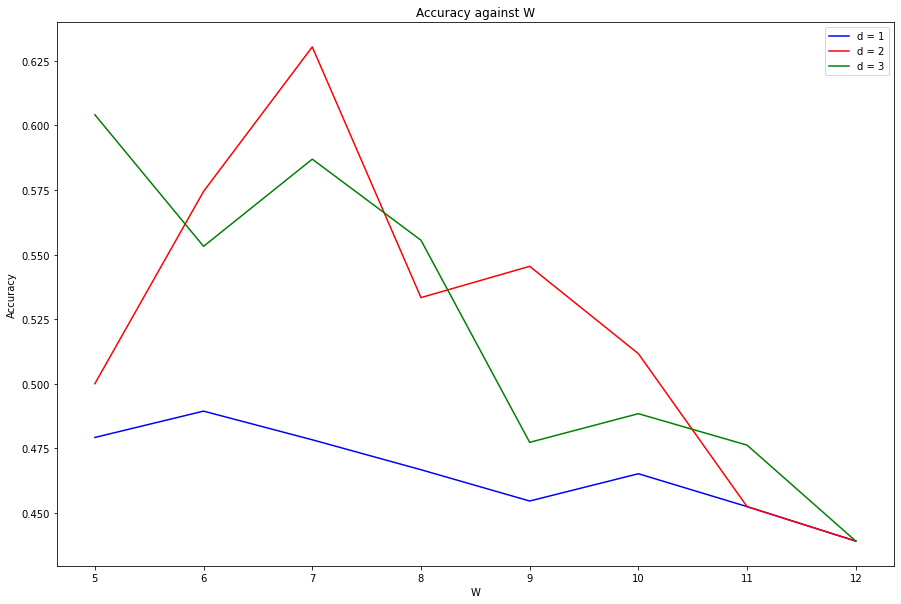

In [183]:
fig = plt.figure(figsize = (15,10))
ax = plt.axes()
ax.plot(list(range(5, 13)), d1_accuracy, color = 'blue', label = "d = 1")
ax.plot(list(range(5, 13)), d2_accuracy, color = 'red',  label = "d = 2")
ax.plot(list(range(5, 13)), d3_accuracy, color = 'green', label = "d = 3")
ax.set(xlabel = "W", ylabel = "Accuracy", 
      title = "Accuracy against W")
ax.legend()

### Q2

For d = 1, the best W is 6. 

For d = 2, the best W is 7. 

For d = 3, the best W is 5. 

In [116]:
mydata2020 = mydata[mydata.year == 2020]

In [124]:
mydata2020 = mydata2020.reset_index(drop = True)

In [132]:
n = mydata2020.shape[0] # total number of weeks in 2019

d1_accuracy = []
d2_accuracy = []
d3_accuracy = []

d1_best_W_pred_P = []
d2_best_W_pred_P = []
d3_best_W_pred_P = []

for W in range(5, 13):
    predict_d1 = []
    predict_d2 = []
    predict_d3 = []
    for i in range(W, n):
        d1_coeff = np.polyfit(mydata2020.week[(i-W):i], mydata2020.end_price[(i-W):i], 1)
        d1_pred_P = d1_coeff[0]+d1_coeff[1]*(mydata2020.week[i])
        if d1_pred_P > mydata2020.end_price[i-1]:            
            predict_d1.append('green')
            if W == 6:
                d1_best_W_pred_P.append('green')
        elif d1_pred_P < mydata2020.end_price[i-1]:            
            predict_d1.append('red')
            if W == 6:
                d1_best_W_pred_P.append('red')
        else:
            predict_d1.append(mydata2020.label[i-1])
            if W == 6:
                d1_best_W_pred_P.append(mydata2020.label[i-1])
    for i in range(W, n):
        d2_coeff = np.polyfit(mydata2020.week[(i-W):i], mydata2020.end_price[(i-W):i], 2)
        d2_pred_P = d2_coeff[0]+d2_coeff[1]*(mydata2020.week[i])+d2_coeff[2]*(mydata2020.week[i]^2)
        if d2_pred_P > mydata2020.end_price[i-1]:
            predict_d2.append('green')
            if W == 7:
                d2_best_W_pred_P.append('green')
        elif d2_pred_P < mydata2020.end_price[i-1]:        
            predict_d2.append('red')
            if W == 7:
                d2_best_W_pred_P.append('red')
        else:
            predict_d2.append(mydata2020.label[i-1])          
            if W == 7:
                d2_best_W_pred_P.append(mydata2020.label[i-1])          
    for i in range(W, n):
        d3_coeff = np.polyfit(mydata2020.week[(i-W):i], mydata2020.end_price[(i-W):i], 3)
        d3_pred_P = d3_coeff[0]+d3_coeff[1]*(mydata2020.week[i])+d3_coeff[2]*(mydata2020.week[i]^2)+d3_coeff[3]*(mydata2020.week[i]^3)
        if d3_pred_P > mydata2020.end_price[i-1]:
            predict_d3.append('green')
            if W == 5:
                d3_best_W_pred_P.append('green')
        elif d3_pred_P < mydata2020.end_price[i-1]:
            predict_d3.append('red')
            if W == 5:
                d3_best_W_pred_P.append('red')
        else:
            predict_d3.append(mydata2020.label[i-1])              
            if W == 5:
                d3_best_W_pred_P.append(mydata2020.label[i-1])              
            
    d1_accuracy.append(np.mean(predict_d1 == mydata2020.label[W:]))
    d2_accuracy.append(np.mean(predict_d2 == mydata2020.label[W:]))
    d3_accuracy.append(np.mean(predict_d3 == mydata2020.label[W:]))    

In [133]:
print("With d = 1 and W = 6, the accuracy for year 2 is %.2lf%%." % (100*d1_accuracy[1]))
print("With d = 2 and W = 7, the accuracy for year 2 is %.2lf%%." % (100*d2_accuracy[2]))
print("With d = 3 and W = 5, the accuracy for year 2 is %.2lf%%." % (100*d3_accuracy[0]))

With d = 1 and W = 6, the accuracy for year 2 is 44.68%.
With d = 2 and W = 7, the accuracy for year 2 is 47.83%.
With d = 3 and W = 5, the accuracy for year 2 is 41.67%.


### Q3

In [135]:
from sklearn.metrics import confusion_matrix

In [152]:
d1_true_label = mydata2020.label[6:] 
d1_true_label = [str(x) for x in d1_true_label]

In [154]:
# row = true label
# column = predict label
confusion_matrix(d1_true_label, d1_best_W_pred_P)

array([[19,  3],
       [23,  2]])


 | | pred label | green | red | 
 | --- | --- | --- | --- |
 | true label | green | 19 | 3 |
 |        | red | 23 | 2 | 

In [160]:
d2_true_label = mydata2020.label[7:] 
d2_true_label = [str(x) for x in d2_true_label]

In [161]:
# row = true label
# column = predict label
confusion_matrix(d2_true_label, d2_best_W_pred_P)

array([[14,  8],
       [16,  8]])


 | | pred label | green | red | 
 | --- | --- | --- | --- |
 | true label | green | 14 | 8 |
 |        | red | 16 | 8 | 

In [162]:
d3_true_label = mydata2020.label[5:] 
d3_true_label = [str(x) for x in d3_true_label]

In [163]:
# row = true label
# column = predict label
confusion_matrix(d3_true_label, d3_best_W_pred_P)

array([[12, 10],
       [18,  8]])


 | | pred label | green | red | 
 | --- | --- | --- | --- |
 | true label | green | 12 | 10 |
 |        | red | 18 | 8 | 

### Q4

In [173]:
d1_balances = []
d2_balances = []
d3_balances = []
n = mydata2020.shape[0]

In [174]:
current_amount = 100
W = 6
for i in range(W, n):
    if d1_best_W_pred_P[i-W] == 'green': 
        current_amount = current_amount*(1+((mydata2020.end_price[i]-mydata2020.start_price[i])/mydata2020.end_price[i]))
        d1_balances.append(current_amount)
    else:
        d1_balances.append(current_amount)

In [175]:
current_amount = 100
W = 7
for i in range(W, n):
    if d2_best_W_pred_P[i-W] == 'green': 
        current_amount = current_amount*(1+((mydata2020.end_price[i]-mydata2020.start_price[i])/mydata2020.end_price[i]))
        d2_balances.append(current_amount)
    else:
        d2_balances.append(current_amount)

In [176]:
current_amount = 100
W = 5
for i in range(W, n):
    if d3_best_W_pred_P[i-W] == 'green': 
        current_amount = current_amount*(1+((mydata2020.end_price[i]-mydata2020.start_price[i])/mydata2020.end_price[i]))
        d3_balances.append(current_amount)
    else:
        d3_balances.append(current_amount)

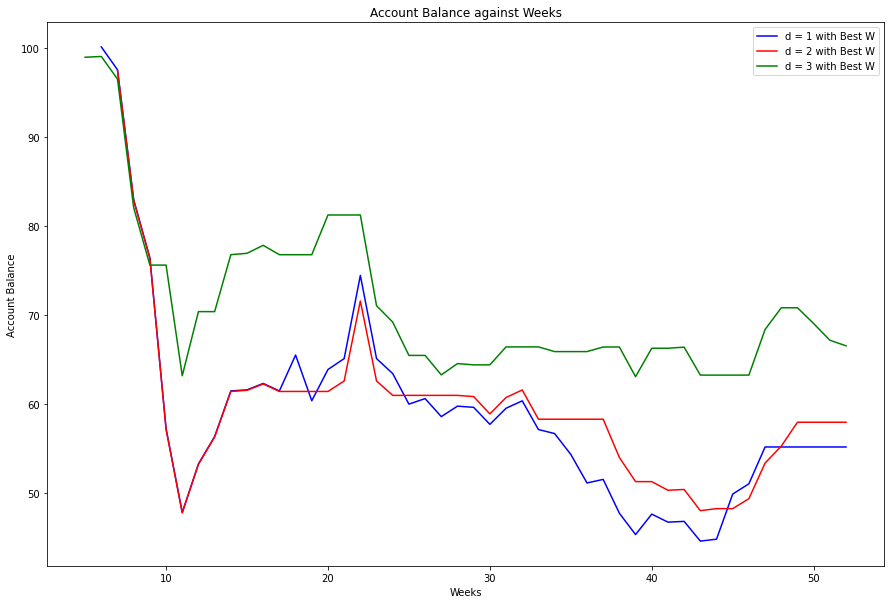

In [180]:
fig = plt.figure(figsize = (15,10))
ax = plt.axes()
ax.plot(list(range(6, n)), d1_balances, color = 'blue', label = "d = 1 with Best W")
ax.plot(list(range(7, n)), d2_balances, color = 'red',  label = "d = 2 with Best W")
ax.plot(list(range(5, n)), d3_balances, color = 'green', label = "d = 3 with Best W")
ax.set(xlabel = "Weeks", ylabel = "Account Balance", 
      title = "Account Balance against Weeks")
ax.legend()

## Questions from "data_science_module_assignment_bakery_dataset.pdf"

In [195]:
bread = pd.read_csv("BreadBasket_DMS_output.csv")

In [196]:
bread.head()

,Year,Month,Day,Weekday,Period,Hour,Min,Sec,Transaction,Item,Item_Price
0,2016,10,30,Sunday,morning,9,58,11,1,Bread,3.01
1,2016,10,30,Sunday,morning,10,5,34,2,Scandinavian,10.38
2,2016,10,30,Sunday,morning,10,5,34,2,Scandinavian,10.38
3,2016,10,30,Sunday,morning,10,7,57,3,Hot chocolate,9.58
4,2016,10,30,Sunday,morning,10,7,57,3,Jam,10.08


### Q1(a)

In [297]:
bread.groupby('Hour').agg(unique_transaction = ('Transaction', lambda x: len(np.unique(x)))).sort_values(by = 'unique_transaction', ascending = False)

,unique_transaction
Hour,
11,1445
12,1347
10,1267
13,1163
14,1130
9,1007
15,924
16,583
8,375


The busiest hour is 11am. 

### Q1(b)

In [299]:
bread.groupby('Weekday').agg(unique_transaction = ('Transaction', lambda x: len(np.unique(x)))).sort_values(by = 'unique_transaction', ascending = False)

,unique_transaction
Weekday,
Saturday,2068
Friday,1488
Sunday,1264
Thursday,1252
Tuesday,1203
Monday,1135
Wednesday,1121


The busiest day of the week is Saturaday

### Q1(c)

In [300]:
bread.groupby('Period').agg(unique_transaction = ('Transaction', lambda x: len(np.unique(x)))).sort_values(by = 'unique_transaction', ascending = False)

,unique_transaction
Period,
afternoon,5307
morning,4110
evening,113
night,1


The busiest period is afternoon. 

### Q2(a)

In [305]:
bread.groupby('Hour').agg(revenue = ('Item_Price', lambda x: sum(x))).sort_values(by = "revenue", ascending = False).head()

,revenue
Hour,
11,21453.44
12,19680.60
13,18097.61
10,18068.59
14,17847.87


The most profitable time is 11am. 

### Q2(b)

In [306]:
bread.groupby('Weekday').agg(revenue = ('Item_Price', lambda x: sum(x))).sort_values(by = "revenue", ascending = False).head()

,revenue
Weekday,
Saturday,31531.83
Sunday,21495.75
Friday,21200.60
Thursday,17314.29
Tuesday,16331.23


The most profitable day of the week is Saturday

### Q2(c)

In [307]:
bread.groupby('Period').agg(revenue = ('Item_Price', lambda x: sum(x))).sort_values(by = "revenue", ascending = False).head()

,revenue
Period,
afternoon,81299.97
morning,56986.96
evening,972.61
night,3.01


The most profitable period is afternoon. 

### Q3

In [323]:
bread.groupby('Item').agg(Item_count = ('Item', lambda x: len(x))).sort_values(by = "Item_count", ascending = False).head()

,Item_count
Item,
Coffee,5471
Bread,3325
Tea,1435
Cake,1025
Pastry,856


The most popular item is coffee. 

In [325]:
bread.groupby('Item').agg(Item_count = ('Item', lambda x: len(x))).sort_values(by = "Item_count", ascending = True).head(10)

,Item_count
Item,
Adjustment,1
Chicken sand,1
Olum & polenta,1
Polenta,1
Bacon,1
Gift voucher,1
The BART,1
Raw bars,1
Siblings,2


The least popular items are Adjustment, Chicken sand, Olumn & polenta, Polenta, Bacon, Gift voucher, the BART, Raw bars. 

The most popular item is Coffee since it has the most transactions. 

### Q4

In [327]:
bread_collapse_by_day = bread.groupby(["Year", "Month", "Day", "Weekday"]).agg(transaction_count = ('Transaction', lambda x: len(x)))
bread_collapse_by_day

transaction_count
Year Month Day Weekday                     
2016 10    30  Sunday                   180
           31  Monday                   205
     11    1   Tuesday                  154
           2   Wednesday                169
           3   Thursday                 195
...                                     ...
2017 4     5   Wednesday                145
           6   Thursday                 119
           7   Friday                   103
           8   Saturday                 209
           9   Sunday                    72

[159 rows x 1 columns]

The number of barristas per day of week are given below. 

In [349]:
pd.DataFrame(bread_collapse_by_day).groupby('Weekday')['transaction_count'].mean()

Weekday
Friday       140.652174
Monday       114.000000
Saturday     208.826087
Sunday       140.565217
Thursday     118.217391
Tuesday      107.826087
Wednesday    105.608696
Name: transaction_count, dtype: float64

The number of barristas we need for each day of the week on average are listed below. 

In [329]:
pd.DataFrame(bread_collapse_by_day).groupby('Weekday')['transaction_count'].mean()/50

Weekday
Friday       2.813043
Monday       2.280000
Saturday     4.176522
Sunday       2.811304
Thursday     2.364348
Tuesday      2.156522
Wednesday    2.112174
Name: transaction_count, dtype: float64

### Q5

In [235]:
bread.head()

,Year,Month,Day,Weekday,Period,Hour,Min,Sec,Transaction,Item,Item_Price,Revenue
0,2016,10,30,Sunday,morning,9,58,11,1,Bread,3.01,3.01
1,2016,10,30,Sunday,morning,10,5,34,2,Scandinavian,10.38,20.76
2,2016,10,30,Sunday,morning,10,5,34,2,Scandinavian,10.38,20.76
3,2016,10,30,Sunday,morning,10,7,57,3,Hot chocolate,9.58,28.74
4,2016,10,30,Sunday,morning,10,7,57,3,Jam,10.08,30.24


In [237]:
pd.unique(bread.Item)

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

In [238]:
drink_names = ['Hot chocolate', 'Coffee', 'Tea', 'Mineral water', 
              'Smoothies', 'Coke', 'Juice', 'Coffee granules ', 
              'My-5 Fruit Shoot', "Ella's Kitchen Pouches", 'Lemon and coconut'] 
food_names = ['Drinking chocolate spoons ', 'Chocolates', 'Soup'
             'Gingerbread syrup', 'Honey', 'Sandwich', 'Eggs',
             'Crepes', 'Toast', 'Bare Popcorn', 'Duck egg', 'Tacos/Fajita',
             'Bacon', 'Bread Pudding', 'Jam', 'Cookies', 'Muffin', 
             'Pastry', 'Chicken sand', 'Cake', 'Brownie', 'Frittata', 
             'Fudge', 'Bread', 'Medialuna', 'Tartine', 'Focaccia',
             'Dulce de Leche', 'Alfajores', 'Granola', 'Empanadas', 
             'Caramel bites', 'Tiffin', 'Truffles', 'Mighty Protein', 
             'Victorian Sponge', 'Chimichurri Oil', 'Jammie Dodgers', 
             'Kids biscuit', 'Salad', 'Chicken Stew', 'Spanish Brunch',
             'Muesli', 'Crisps', 'Pintxos', 'Raspberry shortbread sandwich',
             'Brioche and salami', 'Cherry me Dried fruit', 
             'Hearty & Seasonal', 'Spread', 'Olum & polenta', 'Polenta',
             'Vegan Feast', 'Scone', 'Vegan mincepie', 'Panatone', 
             'Extra Salami or Feta', 'Baguette']
unknown = ["Valentine's card", 'Tshirt', 'Postcard', 'Nomad bag', 
          'Gift voucher', 'Farm House', 'NONE', 'Art Tray', 
          'Keeping It Local', 'Fairy Doors', 'Basket', 'Scandinavian',
          'Afternoon with the baker', 'Pick and Mix Bowls', 'Adjustment', 
          'Siblings', 'The BART', 'Christmas common', 'Mortimer', 'Raw bars', 
          'Argentina Night', 'Half slice Monster ', 'Bowl Nic Pitt', 
          'Hack the stack', 'Bakewell', 'The Nomad']

In [243]:
bread['groups'] = bread['Item'].apply(lambda x: np.where(x in drink_names, "Drinks", np.where(x in food_names, "Food", "Unknown")))

In [245]:
bread.groupby("groups")['Item_Price'].mean()

groups
Drinks     8.400981
Food       4.819024
Unknown    8.019688
Name: Item_Price, dtype: float64

The average price of a drink is \$8.4. The average price of a food is \$4.82. 

### Q6

In [331]:
bread.groupby("groups")['Item_Price'].sum()

groups
Drinks     69820.55
Food       52199.67
Unknown    17242.33
Name: Item_Price, dtype: float64

The coffee shope makes more money from selling drinks. 

### Q7

In [248]:
bread.head()

,Year,Month,Day,Weekday,Period,Hour,Min,Sec,Transaction,Item,Item_Price,Revenue,groups
0,2016,10,30,Sunday,morning,9,58,11,1,Bread,3.01,3.01,Food
1,2016,10,30,Sunday,morning,10,5,34,2,Scandinavian,10.38,20.76,Unknown
2,2016,10,30,Sunday,morning,10,5,34,2,Scandinavian,10.38,20.76,Unknown
3,2016,10,30,Sunday,morning,10,7,57,3,Hot chocolate,9.58,28.74,Drinks
4,2016,10,30,Sunday,morning,10,7,57,3,Jam,10.08,30.24,Food


In [336]:
item_counts = bread.groupby(["Year", "Month", "Day", "Weekday", "Item"]).agg(Transaction_count = ("Item", lambda x: len(x)))

In [337]:
item_counts

Transaction_count
Year Month Day Weekday Item                             
2016 10    30  Sunday  Basket                          2
                       Bread                          29
                       Cake                            1
                       Chicken sand                    1
                       Coffee                         33
...                                                  ...
2017 4     9   Sunday  Spanish Brunch                  5
                       Tacos/Fajita                    3
                       Tea                             5
                       Toast                           2
                       Truffles                        1

[3808 rows x 1 columns]

In [339]:
g = item_counts['Transaction_count'].groupby(["Year", "Month", "Day", "Weekday"], group_keys = False)

In [340]:
g_all_list = g.apply(lambda x: x.sort_values(ascending = False).head(5))

In [341]:
pd.DataFrame(g_all_list)

Transaction_count
Year Month Day Weekday Item                             
2016 10    30  Sunday  Coffee                         33
                       Bread                          29
                       Scandinavian                   16
                       Muffin                         12
                       Tea                            12
...                                                  ...
2017 4     9   Sunday  Coffee                         17
                       Bread                           9
                       Tea                             5
                       Spanish Brunch                  5
                       NONE                            3

[791 rows x 1 columns]

The top 5 most popular items for each day of the week does not stay the same from day to day.

### Q8

In [344]:
g2_all_list = g.apply(lambda x: x.sort_values(ascending = True).head(10))
pd.DataFrame(g2_all_list)

Transaction_count
Year Month Day Weekday Item                                     
2016 10    30  Sunday  Cake                                    1
                       Chicken sand                            1
                       Soup                                    1
                       Ella's Kitchen Pouches                  1
                       Smoothies                               1
...                                                          ...
2017 4     9   Sunday  Cookies                                 1
                       Truffles                                1
                       Coke                                    1
                       Christmas common                        1
                       Extra Salami or Feta                    2

[1581 rows x 1 columns]

The bottom 5 least popular items for each day of the week does not stay the same from day to day.

### Q9

In [280]:
bread.head()

,Year,Month,Day,Weekday,Period,Hour,Min,Sec,Transaction,Item,Item_Price,Revenue,groups
0,2016,10,30,Sunday,morning,9,58,11,1,Bread,3.01,3.01,Food
1,2016,10,30,Sunday,morning,10,5,34,2,Scandinavian,10.38,20.76,Unknown
2,2016,10,30,Sunday,morning,10,5,34,2,Scandinavian,10.38,20.76,Unknown
3,2016,10,30,Sunday,morning,10,7,57,3,Hot chocolate,9.58,28.74,Drinks
4,2016,10,30,Sunday,morning,10,7,57,3,Jam,10.08,30.24,Food


In [346]:
drink_count_by_transaction = bread.groupby("Transaction").agg(drink_count = ('groups', lambda x: sum(x == "Drinks")))

In [347]:
drink_count_by_transaction

,drink_count
Transaction,
1,0
2,0
3,1
4,0
5,1
...,...
9680,0
9681,1
9682,2


In [348]:
np.mean(drink_count_by_transaction)

drink_count    0.871997
dtype: float64

The average drinks per transaction is 0.872. 